# Prepare SL Data for Deep Learning analysis

- **Part 1**
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2023/03/23
- last update : 2023/04/24
- FORS2 : https://github.com/ericnuss/fors2
- Result of StarLight : /sps/lsst/groups/photoz/fors2/FORS2/ResStarlight



          /Users/dagoret/MacOSX/GitHub/LSST/FORS2>ls -l
              total 0
              drwxrwsr-x  3 dagoret  staff   96 Aug 21  2018 ResStarlight
              drwxr-xr-x  9 dagoret  staff  288 Dec 19 18:01 fors2

## Import

In [1]:
import os,sys,re
import h5py
from astropy.table import Table
import random

In [2]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
import pandas as pd
from itertools import cycle, islice


In [3]:
from scipy import ndimage

#from scipy import interp as scinterp
from scipy.interpolate import interp1d

import glob
import collections
#from def_raw_seds import *

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (4, 4),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [5]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [6]:
from def_raw_seds import *

In [7]:
from raw_data_analysis import *

In [8]:
#from spectroscopy import *

In [9]:
# Import the primary photometry classes from rubin_sim.photUtils

#import rubin_sim.phot_Utils.Bandpass as Bandpass
#import rubin_sim.phot_Utils.Sed as Sed
#from rubin_sim.data import get_data_dir

In [10]:
#pysynphot_root_path=os.environ['PYSYN_CDBS']
#path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')
# pysynphot
#import pysynphot as S
#S.refs.setref(area=1)
#S.refs.getref()

In [11]:
WL_BALMER_BREAK= 3646.0 
NQUANTILES = 10
quantiles = np.linspace(0,1,NQUANTILES+1)
quantiles

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [12]:
FLAG_REMOVE_RMAG0 = False

## Start

In [13]:
cwd=os.path.abspath("")
main_dir = cwd
print(f"notebook current executing path : {cwd}")

notebook current executing path : /Volumes/Backup2020/MacOSX/GitHub/LSST/PhotoZ_PhD/DeepLearning/preparedata


## Configuration

### SL

## Start

### Catalog

In [14]:
t = Table.read(filename_fits_catalog)

/Users/dagoret/anaconda3/lib/python3.9/site-packages/astropy/io/fits/connect.py:259: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = data[col.name] == col.null


In [15]:
t

ID,m_ID,RAJ2000,DEJ2000,z,u_z,Rmag,RV,e_RV,RT,Nsp,Lines
,,deg,deg,,,mag,km / s,km / s,,,
int16,bytes1,float64,float64,float64,bytes1,float64,int32,int16,float64,int16,bytes77
1,,13.52815,-28.40486,0.55409,,20.79,166227,55,10.0,1,"[OII],H8,K,H"
2,,13.52997,-28.44776,0.34555,,21.18,103665,40,12.3,1,"K,H,G,H{beta}"
3,,13.52552,-28.4208,0.6866,,21.45,210642,48,11.6,4,"[OII],H9,K,H,H{beta},[OIII],H8"
4,,13.52216,-28.40914,0.68653,,21.62,205959,123,10.6,1,"[OII],H9,K,H,G,H{beta}"
7,,13.50974,-28.42972,0.32371,,22.34,97111,11,16.7,6,"[OII],H{beta},[OIII],H{alpha}"
9,,13.50219,-28.40641,0.29266,,21.6,87798,58,13.1,1,"H9,H8,K,H"
11,,13.49724,-28.39487,0.62688,,22.09,188063,17,24.3,3,"[OII],H10,H8,K,H,H{delta}"
12,,13.49584,-28.39125,0.2973,,21.97,89189,30,14.8,2,"[OII],H10,H9,H8,K,H"


### List

In [16]:
lst=fors2_jct_SL() #remet les spectres dans le rest frame (ie a z=0)

In [17]:
lst = sorted(lst)
print(lst)

['SPEC102', 'SPEC106', 'SPEC107', 'SPEC109', 'SPEC110', 'SPEC111', 'SPEC112', 'SPEC113', 'SPEC114', 'SPEC115', 'SPEC117', 'SPEC118', 'SPEC120', 'SPEC121', 'SPEC123', 'SPEC127', 'SPEC128', 'SPEC13', 'SPEC132', 'SPEC134', 'SPEC135', 'SPEC137', 'SPEC138', 'SPEC141', 'SPEC149', 'SPEC151', 'SPEC152', 'SPEC156', 'SPEC160', 'SPEC161', 'SPEC164', 'SPEC171', 'SPEC178', 'SPEC179', 'SPEC181', 'SPEC182', 'SPEC183', 'SPEC184', 'SPEC185', 'SPEC186', 'SPEC187', 'SPEC188', 'SPEC189', 'SPEC19', 'SPEC191', 'SPEC192', 'SPEC193', 'SPEC194', 'SPEC196', 'SPEC197', 'SPEC198', 'SPEC2', 'SPEC204', 'SPEC205', 'SPEC210', 'SPEC214', 'SPEC218', 'SPEC221', 'SPEC222', 'SPEC223', 'SPEC226', 'SPEC227', 'SPEC231', 'SPEC233', 'SPEC234', 'SPEC235', 'SPEC236', 'SPEC237', 'SPEC238', 'SPEC24', 'SPEC240', 'SPEC242', 'SPEC243', 'SPEC244', 'SPEC245', 'SPEC246', 'SPEC248', 'SPEC249', 'SPEC25', 'SPEC250', 'SPEC252', 'SPEC253', 'SPEC258', 'SPEC259', 'SPEC260', 'SPEC261', 'SPEC262', 'SPEC264', 'SPEC265', 'SPEC266', 'SPEC267', 'SPE

In [18]:
all_specfilenames = os.listdir(path_BC)

In [19]:
all_specfilenames = sorted(all_specfilenames)

In [20]:
all_numbers = [ int(re.findall('^SPEC(.*)_HZ4_BC[.]txt$',fn)[0]) for fn in all_specfilenames ]

In [21]:
all_numbers = sorted(all_numbers)

In [22]:
NSED = len(all_numbers)
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NSED)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NSED), alpha=1)

In [23]:
cut = t["ID"] == 3
t[cut]

ID,m_ID,RAJ2000,DEJ2000,z,u_z,Rmag,RV,e_RV,RT,Nsp,Lines
,,deg,deg,,,mag,km / s,km / s,,,
int16,bytes1,float64,float64,float64,bytes1,float64,int32,int16,float64,int16,bytes77
3,,13.52552,-28.4208,0.6866,,21.45,210642,48,11.6,4,"[OII],H9,K,H,H{beta},[OIII],H8"


# Read all SEDS and noremalised them in a range 0 - 10000 nm and interpolate

In [24]:
WL = np.arange(0,12000,1)
NWL = len(WL)
NSAMPLES = NSED
flux_out=np.zeros((NSAMPLES,NWL))

In [25]:
all_normspectra = []
all_integ = []
all_tag = []
all_sed = []

all_redshifts = []
all_num = []
all_ra = []
all_dec = []
all_Rmag = []
all_RV = []
all_eRV = []
all_RT = []
all_Nsp = []


for idx,the_num in enumerate(all_numbers):
    
    tcut     = t["ID"] == the_num
    redshift = t[tcut]["z"].value[0]
    lines    = t[tcut]["Lines"].value[0]
    ra       = t[tcut]["RAJ2000"].value[0]
    dec      = t[tcut]["DEJ2000"].value[0]
    Rmag     = t[tcut]["Rmag"].value[0]
    RV       = t[tcut]["RV"].value[0]
    e_RV     = t[tcut]["e_RV"].value[0]
    RT       = t[tcut]["RT"].value[0]
    Nsp      = t[tcut]["Nsp"].value[0]
    
    
    
    
    filename = f"SPEC{the_num}_HZ4_BC.txt"
    tag = f"SPEC{the_num} , z={redshift:.2f}, lines={lines}"
    fullfilename = os.path.join(path_BC,filename)
    the_sed=SED(fullfilename,label=tag)
    all_sed.append(the_sed)
    arr = np.loadtxt(fullfilename)
    
    # select wavelength in an appropriate range 
    wl=arr[:-1,0]  
    wlrange = np.where(np.logical_and(wl>=0,wl<=10000))[0]
    
    wl=arr[wlrange,0] 
    flambda=arr[wlrange,1]
    
    
    x = WL
    y = np.interp(x, wl, flambda)
    
    
    # normalize spectrum wrt its integral between 0-10000 angstrom
    integ = np.trapz(y,x)
    the_normspectra = y/integ
    flux_out[idx,:]= the_normspectra
    
    all_normspectra.append(the_normspectra)
    
    all_tag.append(tag)
    
    # RAJ2000	DEJ2000	z	u_z	Rmag	RV	e_RV	RT	Nsp	
    all_redshifts.append(redshift)
    all_num.append(the_num) 
    all_ra.append(ra) 
    all_dec.append(dec) 
    all_Rmag.append(Rmag)
    all_RV.append(RV)
    all_eRV.append(e_RV)
    all_RT.append(RT)
    all_Nsp.append(Nsp)
    

In [26]:
all_redshifts = np.array(all_redshifts)
all_num = np.array(all_num)
all_ra = np.array(all_ra)
all_dec = np.array(all_dec)
all_Rmag = np.array(all_Rmag)
all_RV = np.array(all_RV)
all_eRV = np.array(all_eRV)
all_RT = np.array(all_RT)
all_Nsp = np.array(all_Nsp)

## Remove RMag = 0

In [27]:
if FLAG_REMOVE_RMAG0:
    idx_selected = np.where(all_Rmag != 0)[0]

In [28]:
if FLAG_REMOVE_RMAG0:
    all_redshifts = all_redshifts[idx_selected]
    all_num       = all_num[idx_selected]
    all_ra        = all_ra[idx_selected]
    all_dec       = all_dec[idx_selected]
    all_Rmag      = all_Rmag[idx_selected]
    all_RV        = all_RV[idx_selected]
    all_eRV       = all_eRV[idx_selected]
    all_RT        = all_RT[idx_selected]
    all_Nsp       = all_Nsp[idx_selected]

In [29]:
if FLAG_REMOVE_RMAG0:
    NSAMPLES = len(idx_selected)

    flux_out_sel=np.zeros((NSAMPLES,NWL))
    flux_out_sel = flux_out[idx_selected,:]
    flux_out     = flux_out_sel 

# Blue part / red part 

In [30]:
idx_blue = np.where (WL<WL_BALMER_BREAK)[0]
idx_red = np.where (WL>=WL_BALMER_BREAK)[0]
wl_blue = WL[idx_blue]
wl_red = WL[idx_red]

In [31]:
# idx=0 flux before Balmer Break
# idx=1 flux after Balmer Break
# idx=2 flux sum  before and after Balmer Break
# idx=3 flux fraction before Balmer break
# idx=4 flux fraction after Balmer break
# idx=5 flux ratio  
# idx=6 flux ratio  


flux_integ=np.zeros((NSAMPLES,7))

In [32]:
for idx in range(NSAMPLES):
    
    flux_blue = flux_out[idx,idx_blue]
    flux_red  = flux_out[idx,idx_red]
    
    flux_integ[idx,0] =  np.trapz(flux_blue ,wl_blue)
    flux_integ[idx,1] =  np.trapz(flux_red ,wl_red)
    flux_integ[idx,2] = flux_integ[idx,0] + flux_integ[idx,1] 
    
    flux_integ[idx,3] = flux_integ[idx,0] / flux_integ[idx,2] 
    flux_integ[idx,4] = flux_integ[idx,1] / flux_integ[idx,2] 
    
    flux_integ[idx,5] = flux_integ[idx,0] / flux_integ[idx,1] 
    flux_integ[idx,6] = flux_integ[idx,1] / flux_integ[idx,0] 
    

Text(0.5, 0, 'flux_integ[:,3]')

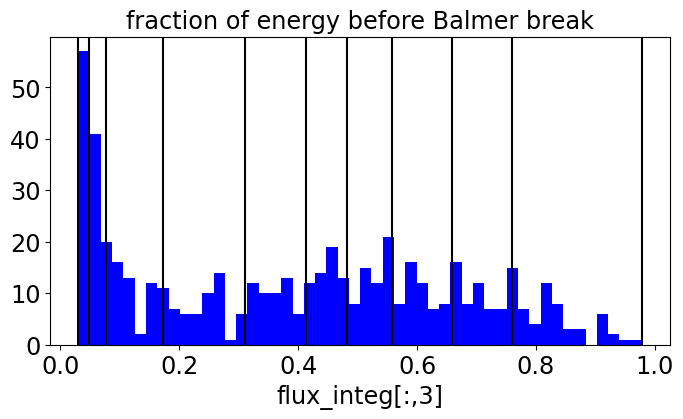

In [33]:
plt.figure(figsize=(8,4))
plt.hist(flux_integ[:,3],bins=50,facecolor="b" );
quantiles_thr = np.quantile(flux_integ[:,3], quantiles)
digitized = np.digitize(flux_integ[:,3],quantiles_thr)

for thr in quantiles_thr:
    plt.axvline(thr,color='k')
    
plt.title("fraction of energy before Balmer break")
plt.xlabel("flux_integ[:,3]")

In [34]:
digitized

array([ 4,  4,  3, 10,  4,  6,  5,  6,  4,  9,  1,  5,  2,  7,  3,  4,  6,
        5, 10,  3,  5,  2, 10,  8,  2,  6,  6, 10,  4,  5,  4,  5,  5,  9,
        6,  7,  9, 10,  9, 10,  7,  4, 10,  8,  4,  9,  9,  5, 10,  8,  7,
        8,  6,  7,  6,  6,  5,  2,  8,  7,  5,  5,  9,  3,  9,  4,  3,  5,
        1,  2, 10,  7,  7, 10,  5,  8,  1,  4,  1,  3,  2,  9,  9,  5,  1,
        9,  1,  1,  4,  5,  2, 10,  7,  4,  2,  6,  4,  1,  9,  4,  3,  1,
        3,  6,  7,  2,  3,  3,  2,  6,  9,  5,  8,  3,  7,  4,  8,  5,  7,
        5,  6,  4,  9,  4,  5,  7,  7,  6,  8, 10,  5, 10,  6,  2,  2,  4,
        9,  1,  2,  7,  8,  7,  2,  7,  2,  1,  3,  3, 10,  3,  2, 10, 10,
        3,  4,  3,  1,  7,  5, 10,  5,  5,  9,  7,  9,  2,  6,  3,  6,  6,
        3,  8,  7,  7,  5,  5,  8,  6,  7,  2,  2,  8,  7,  4,  5,  6,  7,
        3,  9,  6, 11,  4,  1,  9,  2,  5,  5,  8,  2,  4,  1,  1,  5,  4,
        3,  9,  5,  8, 10,  6,  9,  6,  4,  6,  3,  9,  8,  6,  3,  8,  1,
        1, 10,  3,  3,  4

Text(0.5, 1.0, 'fraction of energy after Balmer break')

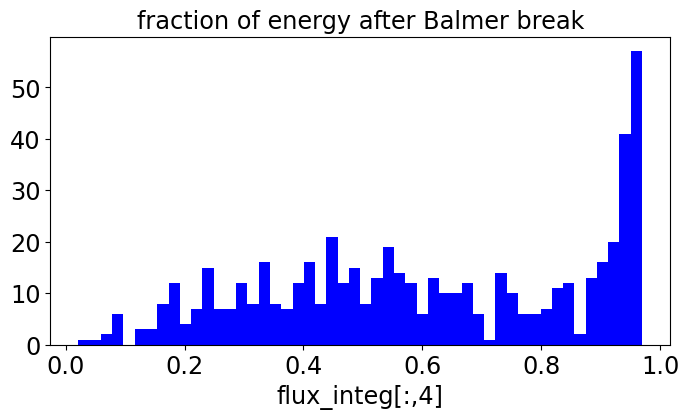

In [35]:
plt.figure(figsize=(8,4))
plt.hist(flux_integ[:,4],bins=50,facecolor="b" );
plt.xlabel("flux_integ[:,4]")
plt.title("fraction of energy after Balmer break")

In [36]:
jet2 = plt.get_cmap('jet')
cNorm2 = colors.Normalize(vmin=0, vmax=np.max(all_redshifts))
scalarMap2 = cmx.ScalarMappable(norm=cNorm2, cmap=jet)
all_colors2 = scalarMap2.to_rgba(all_redshifts, alpha=1)

## Position of SL galaxies vs redshifts

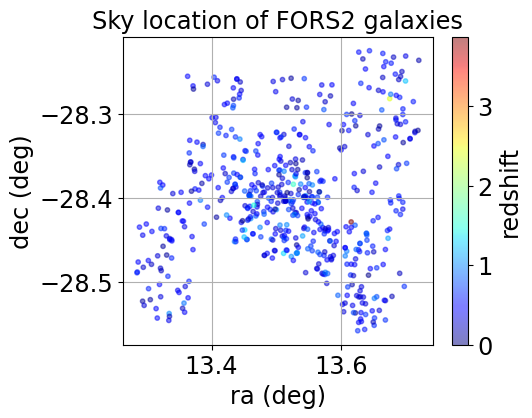

In [37]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1,1,1)
#im = ax.scatter(all_ra,all_dec,c=all_colors2,s=10,marker="o",alpha=0.5,cmap=jet2)
im = ax.scatter(all_ra,all_dec,c=all_redshifts,s=10,marker="o",alpha=0.5,cmap="jet")
ax.grid()
ax.set_xlabel("ra (deg)")
ax.set_ylabel("dec (deg)")
ax.set_title("Sky location of FORS2 galaxies")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('redshift')

## Position vs Redshift

Text(0.5, 0.98, 'redshift')

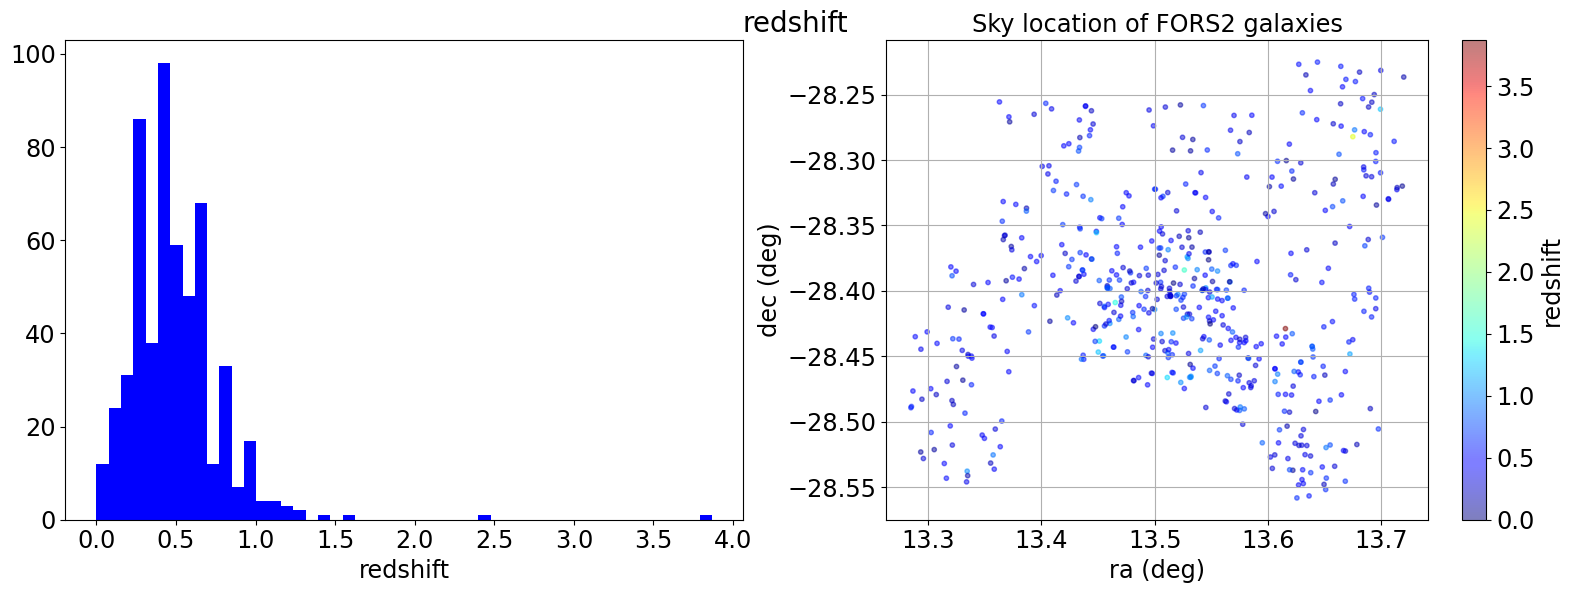

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for idx, ax in enumerate(axes.flatten()):
    if idx == 0:
        ax.hist(all_redshifts,bins=50,facecolor="b");
        ax.set_xlabel("redshift")
    else:
        im = ax.scatter(all_ra,all_dec,c=all_redshifts,s=10,marker="o",alpha=0.5,cmap="jet")
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label('redshift')
        ax.grid()
        ax.set_xlabel("ra (deg)")
        ax.set_ylabel("dec (deg)")
        ax.set_title("Sky location of FORS2 galaxies")
        #fig.colorbar(im, ax=ax)
plt.tight_layout()  
plt.suptitle("redshift",fontsize=20)

In [39]:
index_selected=np.where(all_redshifts<1)[0]

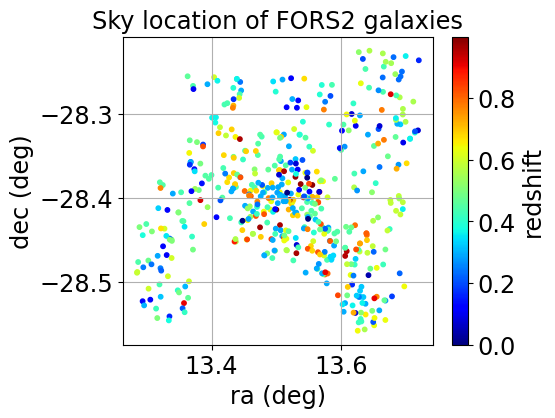

In [40]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1,1,1)
#im = ax.scatter(all_ra,all_dec,c=all_colors2,s=10,marker="o",alpha=0.5,cmap=jet2)
im = ax.scatter(all_ra[index_selected],all_dec[index_selected],c=all_redshifts[index_selected],s=10,marker="o",alpha=1,cmap="jet")
ax.grid()
ax.set_xlabel("ra (deg)")
ax.set_ylabel("dec (deg)")
ax.set_title("Sky location of FORS2 galaxies")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('redshift')

## Position of galaxies vs Rmag

Text(0.5, 0.98, 'Rmag')

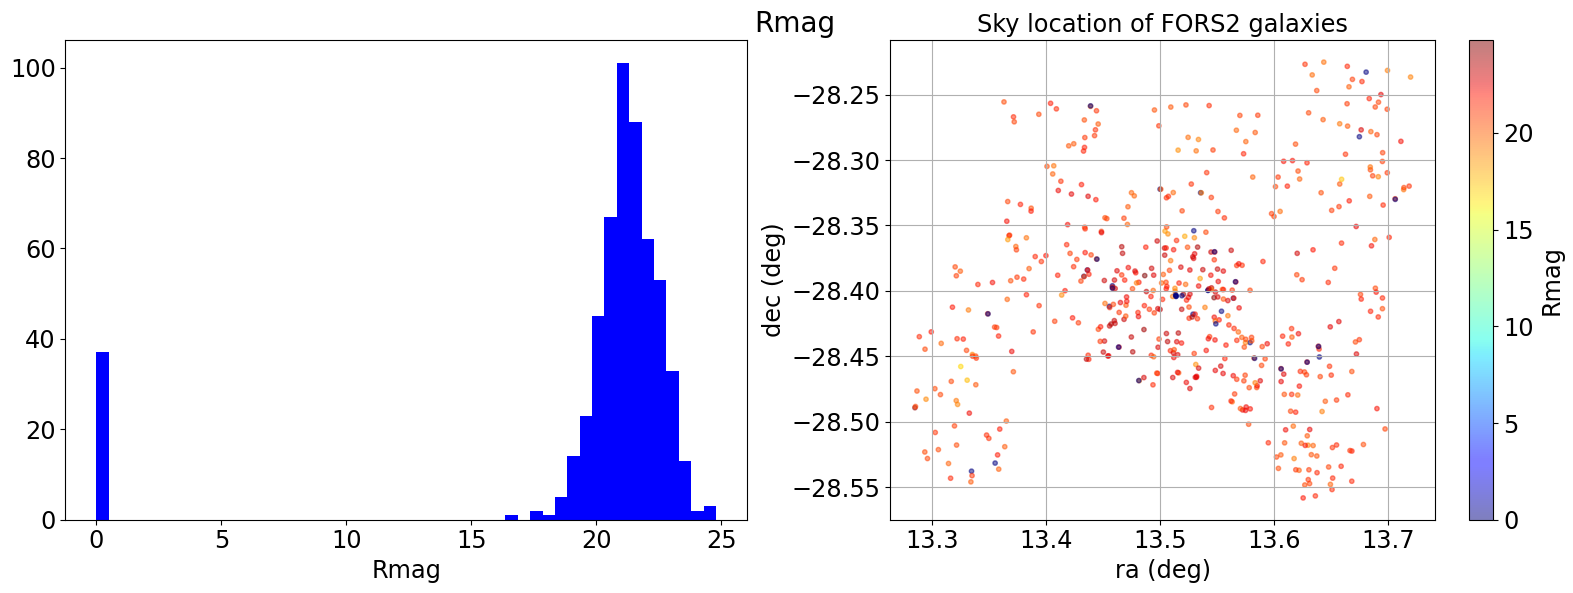

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for idx, ax in enumerate(axes.flatten()):
    if idx == 0:
        ax.hist(all_Rmag,bins=50,facecolor="b");
        ax.set_xlabel("Rmag")
    else:
        im = ax.scatter(all_ra,all_dec,c=all_Rmag,s=10,marker="o",alpha=0.5,cmap="jet")
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label('Rmag')
        ax.grid()
        ax.set_xlabel("ra (deg)")
        ax.set_ylabel("dec (deg)")
        ax.set_title("Sky location of FORS2 galaxies")
        #fig.colorbar(im, ax=ax)
plt.tight_layout() 
plt.suptitle("Rmag",fontsize=20)

## Position of galaxies vs RT

Text(0.5, 0.98, 'RT')

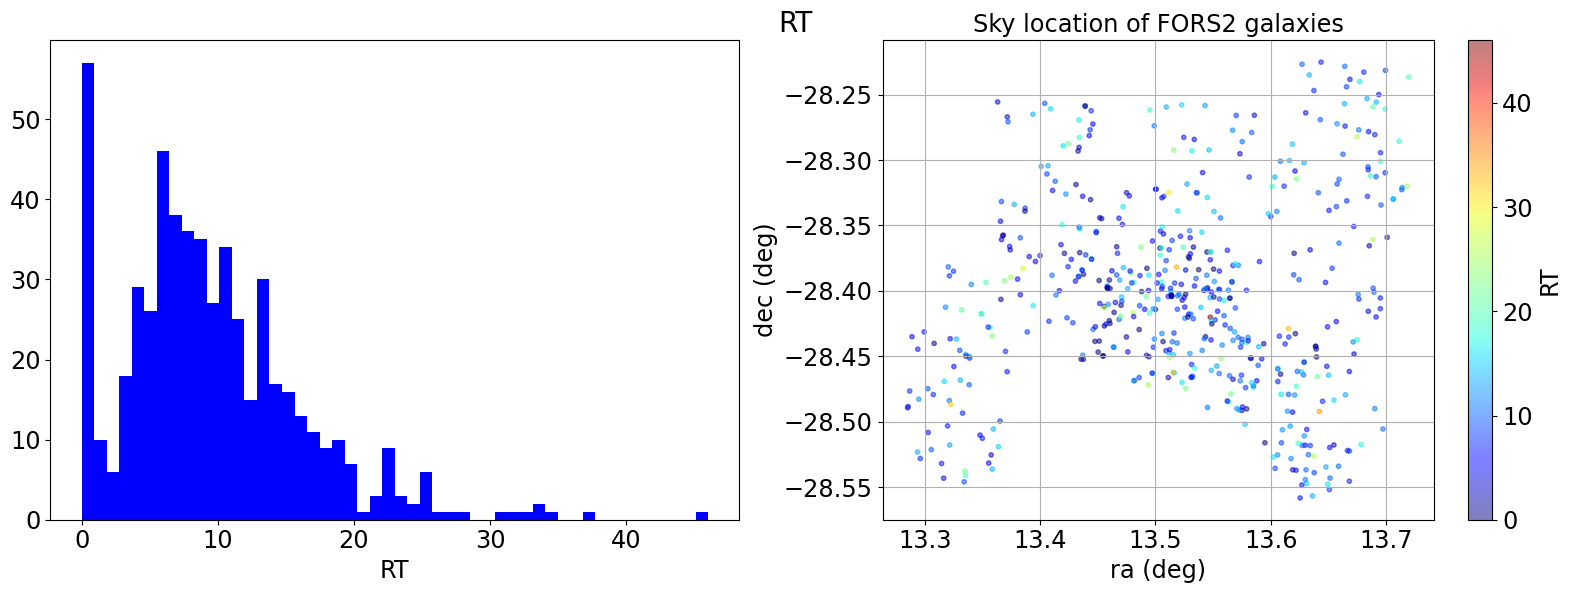

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for idx, ax in enumerate(axes.flatten()):
    if idx == 0:
        ax.hist(all_RT,bins=50,facecolor="b");
        ax.set_xlabel("RT")
    else:
        im = ax.scatter(all_ra,all_dec,c=all_RT,s=10,marker="o",alpha=0.5,cmap="jet")
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label('RT')
        ax.grid()
        ax.set_xlabel("ra (deg)")
        ax.set_ylabel("dec (deg)")
        ax.set_title("Sky location of FORS2 galaxies")
        #fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.suptitle("RT",fontsize=20)

## Position of galaxies vs RV

Text(0.5, 0.98, 'RV')

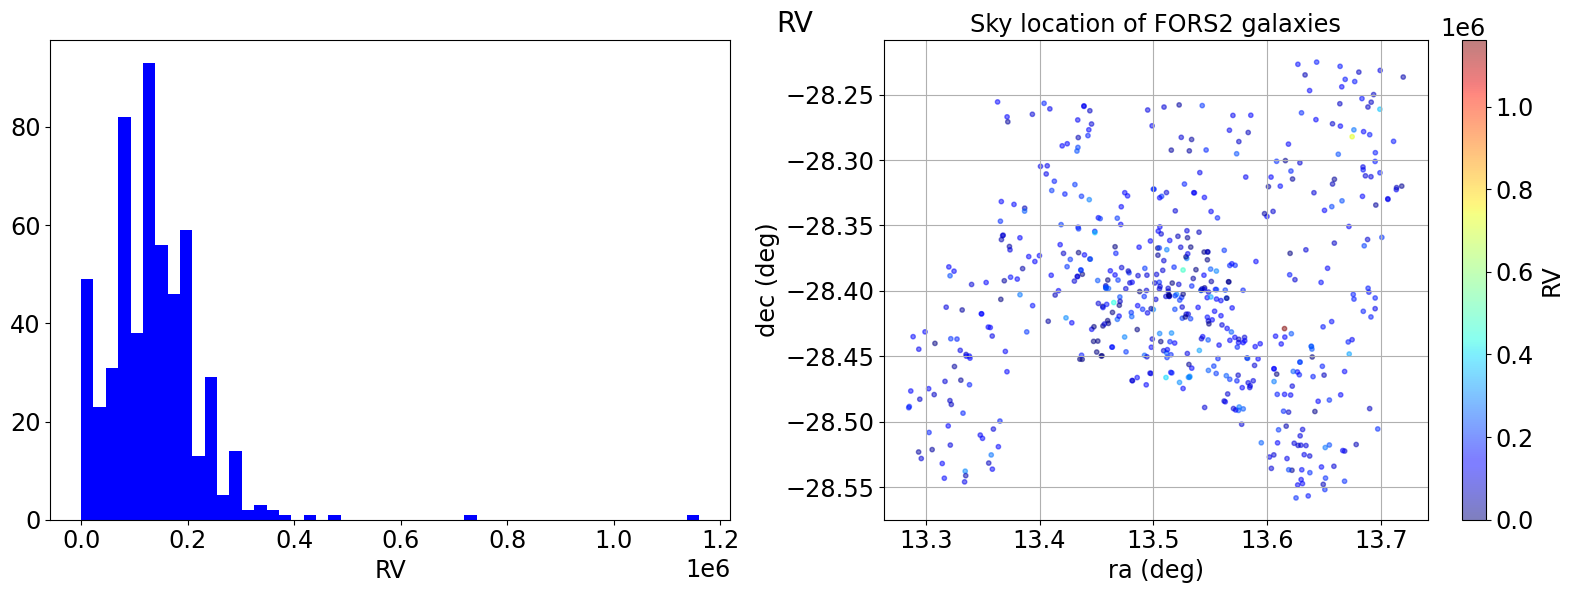

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for idx, ax in enumerate(axes.flatten()):
    if idx == 0:
        ax.hist(all_RV,bins=50,facecolor="b");
        ax.set_xlabel("RV")
    else:
        im = ax.scatter(all_ra,all_dec,c=all_RV,s=10,marker="o",alpha=0.5,cmap="jet")
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label('RV')
        ax.grid()
        ax.set_xlabel("ra (deg)")
        ax.set_ylabel("dec (deg)")
        ax.set_title("Sky location of FORS2 galaxies")
        #fig.colorbar(im, ax=ax)
plt.tight_layout() 
plt.suptitle("RV",fontsize=20)

## Position vs Nsp

Text(0.5, 0.98, 'Nsp')

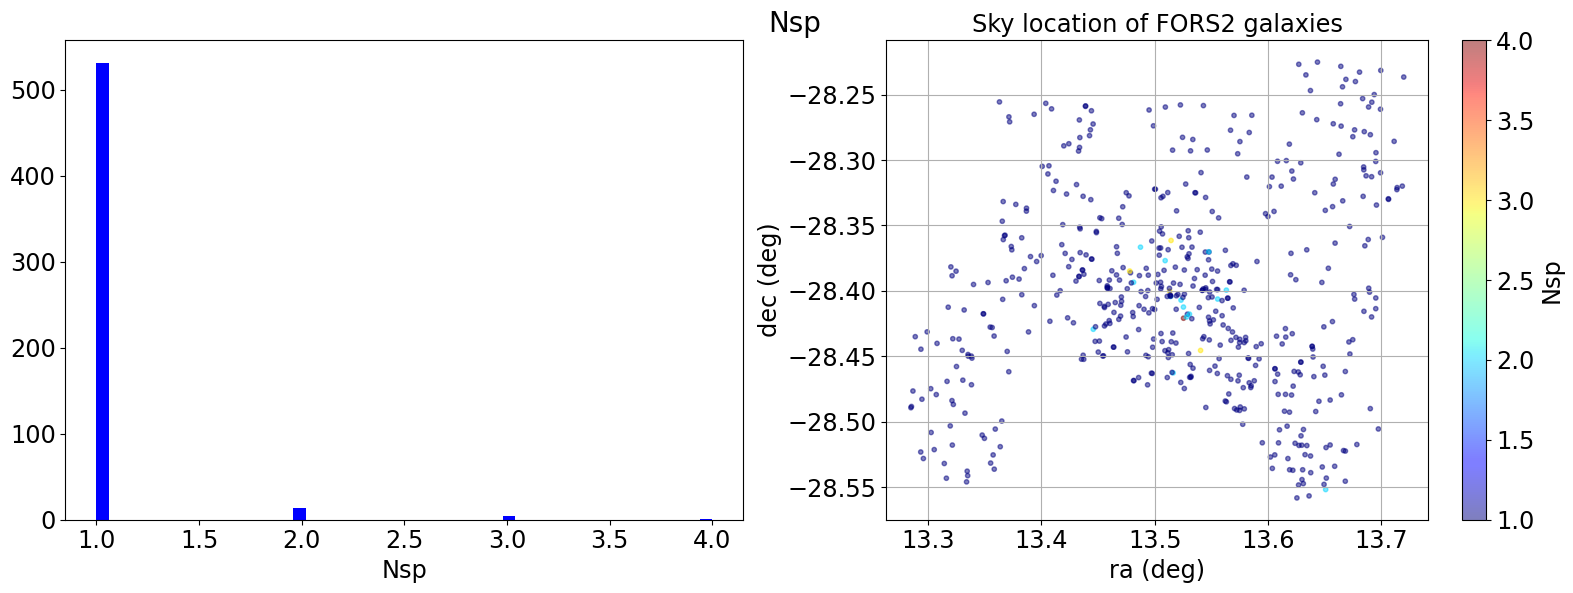

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for idx, ax in enumerate(axes.flatten()):
    if idx == 0:
        ax.hist(all_Nsp,bins=50,facecolor="b");
        ax.set_xlabel("Nsp")
    else:
        im = ax.scatter(all_ra,all_dec,c=all_Nsp,s=10,marker="o",alpha=0.5,cmap="jet")
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label('Nsp')
        ax.grid()
        ax.set_xlabel("ra (deg)")
        ax.set_ylabel("dec (deg)")
        ax.set_title("Sky location of FORS2 galaxies")
        #fig.colorbar(im, ax=ax)
plt.tight_layout() 
plt.suptitle("Nsp",fontsize=20)

# Save in a file 

In [45]:
with h5py.File('SLspectra.hdf5', 'w') as hf:
    hf.create_dataset("flambda", data = flux_out,dtype="float32")
    hf.create_dataset("wl", data = WL,dtype="float32")
    hf.create_dataset("redshift", data = all_redshifts,dtype="float32")
    hf.create_dataset("quantile", data = digitized,dtype="int")
    hf.create_dataset("fracinfbalmer", data = flux_integ[:,3],dtype="float32")
    
    hf.create_dataset("num", data = all_num,dtype="int")
    
    hf.create_dataset("ra", data = all_ra,dtype="float32")
    hf.create_dataset("dec", data = all_dec,dtype="float32")
    hf.create_dataset("Rmag", data = all_Rmag,dtype="float32")
    hf.create_dataset("RV", data = all_RV,dtype="float32")
    hf.create_dataset("eRV", data = all_eRV,dtype="float32")
    hf.create_dataset("RT", data = all_RT,dtype="float32")
    hf.create_dataset("Nsp", data = all_Nsp,dtype="float32")

In [46]:
hf.close()

# Plots

In [47]:
cmap = plt.cm.get_cmap('jet', NQUANTILES) 

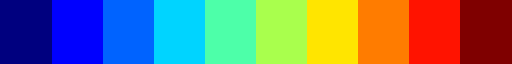

In [48]:
cmap

In [49]:
cmap(0)

(0.0, 0.0, 0.5, 1.0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Spectral Energy Distribution of FOR2/SL synthetised Templates')

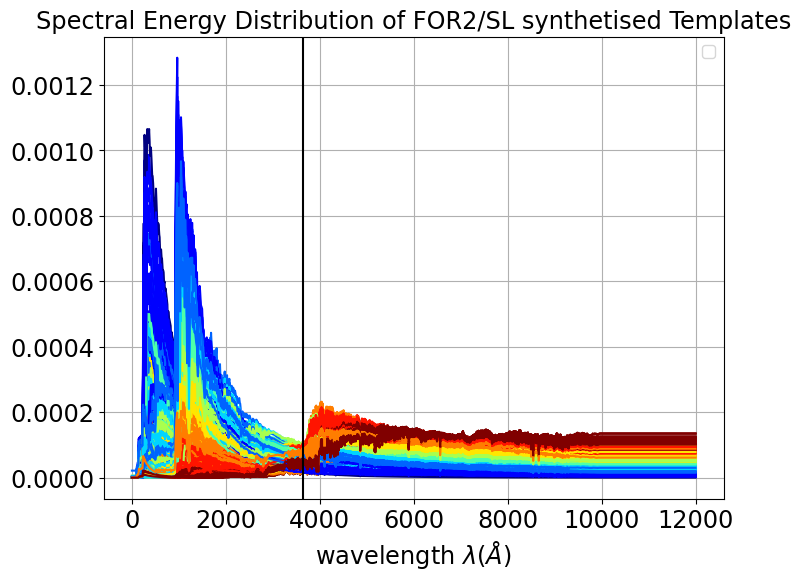

In [50]:
fig = plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
for idx in range(NSAMPLES):
       
    nq = digitized[idx]-1
    col =cmap(NQUANTILES-nq)
    ax.plot(WL,flux_out[idx,:], color=col)
    
    
ax.axvline(WL_BALMER_BREAK,color="k")    
ax.legend(loc="upper right")
ax.grid()
ax.set_xlabel("wavelength $\lambda   (\AA)$")
ax.set_title("Spectral Energy Distribution of FOR2/SL synthetised Templates")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Spectral Energy Distribution of FOR2/SL synthetised Templates')

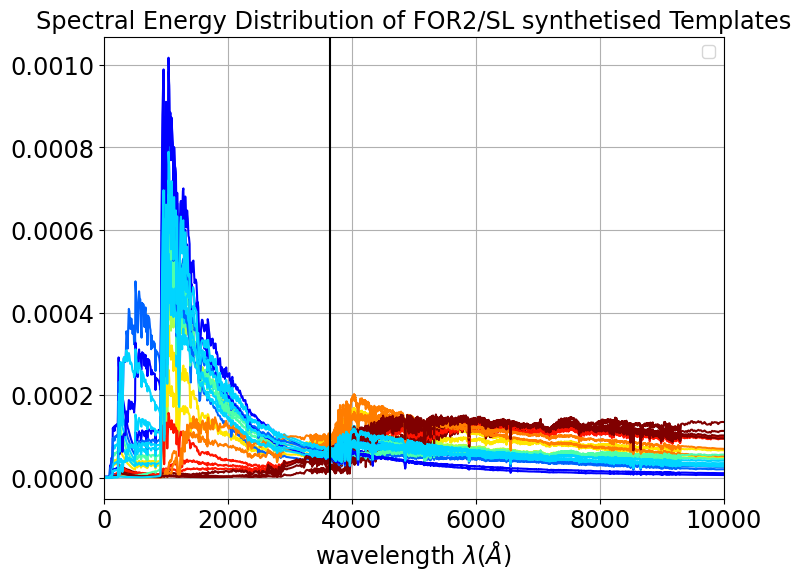

In [51]:
fig = plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
for idx in range(NSAMPLES):
       
    nq = digitized[idx]-1
    col =cmap(NQUANTILES-nq)
    
    u = random.random()
    if u < 0.05:
        ax.plot(WL,flux_out[idx,:], color=col)
    
ax.set_xlim(0,10000)    
ax.axvline(WL_BALMER_BREAK,color="k")    
ax.legend(loc="upper right")
ax.grid()
ax.set_xlabel("wavelength $\lambda   (\AA)$")
ax.set_title("Spectral Energy Distribution of FOR2/SL synthetised Templates")

In [52]:
if 0:
    #plt.figure(figsize=(16,20))
    for idx in range(NSAMPLES):
        plt.figure(figsize=(16,2))
      
        nq = digitized[idx]-1
        col =cmap(NQUANTILES-nq)
    
        plt.plot(WL,flux_out[idx,:], color=col,label=all_tag[idx])
        plt.legend(loc="upper right")
        plt.grid()
        #plt.axvline(4150,color="k")
        #plt.axvline(4250,color="k")
        #plt.ylim(-0.02,0.4)
        #plt.xlim(0.,20000.)
        
    plt.show()

# Read again the data

In [53]:
with h5py.File('SLspectra.hdf5', 'r') as hf:
    data_in = hf['flambda'][:]
    wl_in = hf['wl'][:]
    target = hf['quantile'][:]

    # other data
    redshift = hf['redshift'][:]
    Rmag = hf['Rmag'][:]
    RT = hf['RT'][:]
    RV = hf['RV'][:]
    ra = hf['ra'][:]
    dec = hf['dec'][:]
    fracinfbalmer = hf['fracinfbalmer'][:]


In [54]:
spectra = data_in
wavelengths = wl_in

In [55]:
spectra.shape

(550, 12000)

In [56]:
#plt.figure(figsize=(16,20))
if 0:
    for idx in range(NSED):
        plt.figure(figsize=(16,2))
        #plt.plot(all_wl[idx],all_normspectra[idx], color=all_colors[idx],label=all_tag[idx])
        plt.plot(wl_in,data_in[idx,:], color=all_colors[idx],label=all_tag[idx])
        plt.legend(loc="upper right")
        plt.grid()
        #plt.axvline(4150,color="k")
        #plt.axvline(4250,color="k")
        #plt.ylim(-0.02,0.4)
        #plt.xlim(0.,20000.)
    plt.show()

In [57]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(1-fracinfbalmer, alpha=1)

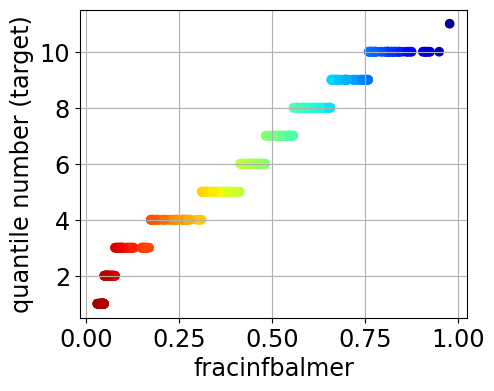

In [58]:
fig = plt.figure(figsize=(5,4))
ax=fig.add_subplot(1,1,1)
ax.scatter(fracinfbalmer,target,color=all_colors,cmap=jet)
ax.set_xlabel("fracinfbalmer")
ax.set_ylabel("quantile number (target)")
ax.grid()

In [59]:
NQ = len(np.unique(target))

In [60]:
jet10 = plt.get_cmap('jet')
cNorm10 = colors.Normalize(vmin=1, vmax=NQ)
scalarMap10 = cmx.ScalarMappable(norm=cNorm10, cmap=jet10)
all_colors10 = scalarMap10.to_rgba(np.arange(10,0,-1), alpha=1)

In [61]:
ncols=2
nrows= NQ//ncols

In [62]:
nrows

5

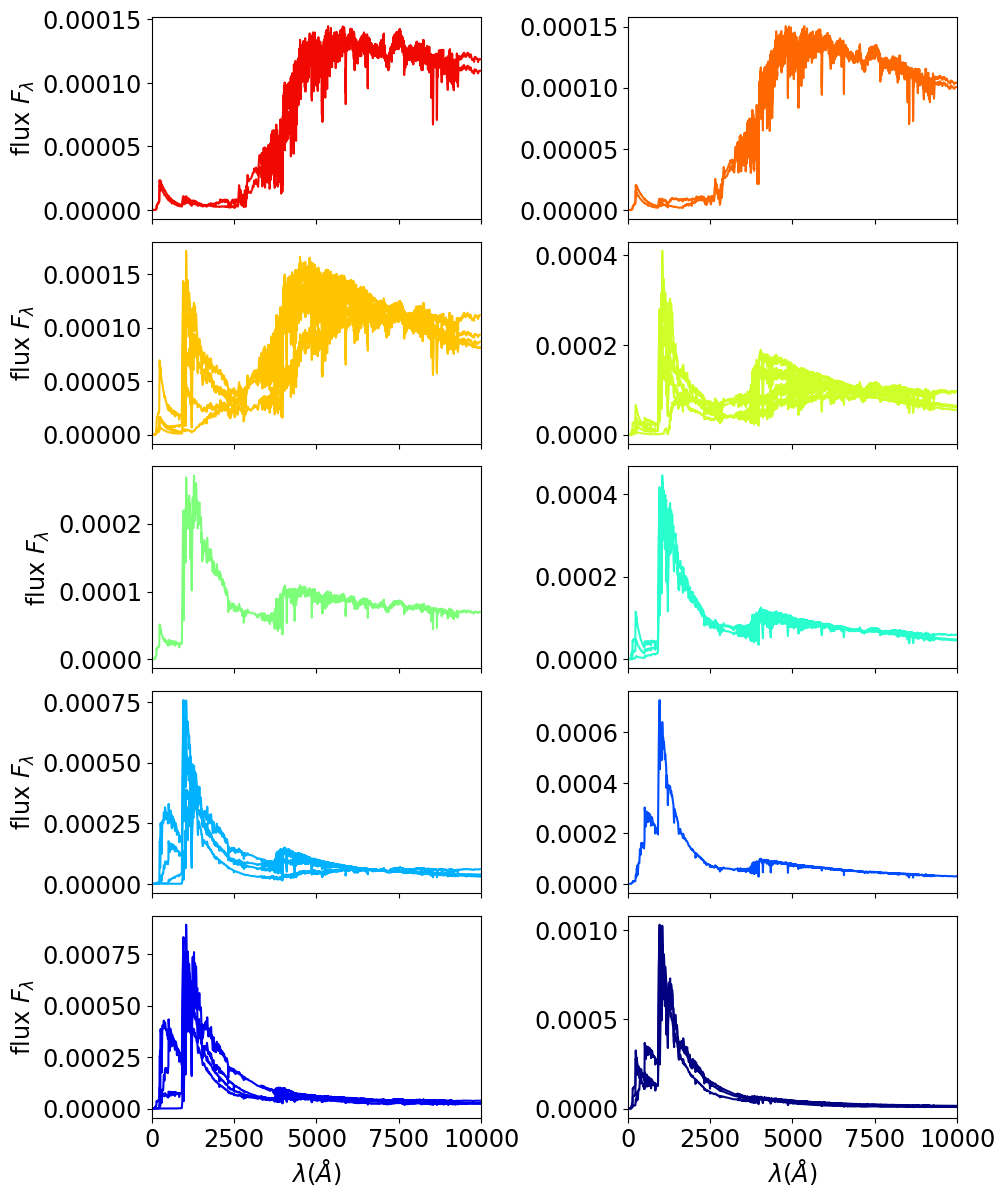

In [63]:
fig, axes = plt.subplots(ncols=ncols,nrows=nrows, sharex=True, sharey=False,figsize=(10,12))

# loop on quantiles
for idx, ax in enumerate(axes.flat):
    
    selected_indexes = np.where(target==idx+1)[0]
            
    for idx_sel in selected_indexes:
        u = random.random()
        if u< 0.07:
            ax.plot(wavelengths,spectra[idx_sel,:],c=all_colors10[idx] )
    ax.set_xlim(0,10000) 
    
    if idx==8 or idx ==9:
        ax.set_xlabel("$\lambda  (\AA)$")
        
    if idx%ncols ==0:
        ax.set_ylabel("flux $F_\lambda$")
        
plt.tight_layout()